# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [42]:
#import
import pandas as pd
import numpy as np


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [43]:

# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [44]:
sensor.values

array([[ 1.528132, -0.733896,  0.696372, ...,  0.294894, -0.184493,
         0.377542],
       [ 1.527992, -0.716987,  0.677762, ...,  0.219405,  0.035846,
         0.114866],
       [ 1.527765, -0.706999,  0.670951, ...,  0.010714,  0.134701,
        -0.167808],
       ...,
       [ 1.830821, -0.578367,  2.447967, ..., -0.08559 , -0.030209,
        -0.08774 ],
       [ 1.849557, -0.586962,  2.439458, ..., -0.048105,  0.029555,
         0.060441],
       [ 1.869375, -0.596783,  2.433775, ..., -0.065011, -0.042575,
         0.046052]])

In [45]:
if not sensor.isnull().values.any():
    print("No hay valores null")

No hay valores null


How many rows and columns are in our data?

In [46]:
(fil,col)=sensor.shape

print(f"Tiene {fil} filas y {col} columnas")

Tiene 1751 filas y 12 columnas


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [47]:
indice=(pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=fil))
indice.freq=pd.infer_freq(indice)
sensor=sensor.set_index(indice)
sensor.index


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Assign the time series index to the dataframe's index.

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

In [48]:

from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(sensor['userAcceleration.x'], model="additive", period=60)


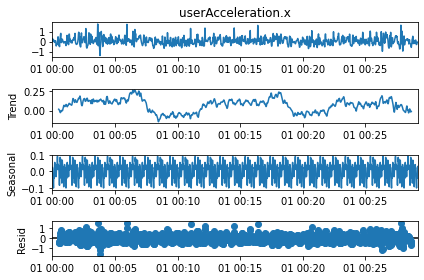

In [49]:
res.plot();

Let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

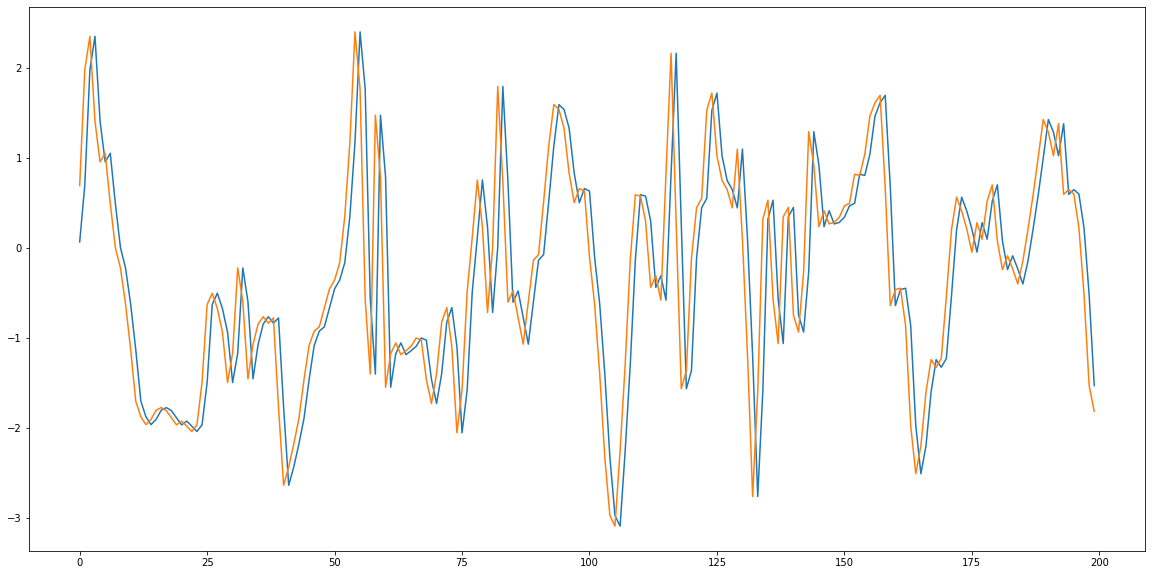

In [50]:
import matplotlib.pyplot as plt

data=sensor['rotationRate.x'][:-1]
data_plus1=sensor['rotationRate.x'][1:]
plt.figure(figsize=(20,10))

plt.plot(data[100:300].values, label='y(t)')
plt.plot(data_plus1[100:300].values, label='y(t+10)')


No handles with labels found to put in legend.


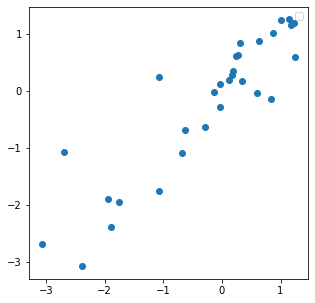

In [51]:
plt.figure(figsize=(5,5))
plt.scatter(data[:30].values, data_plus1[:30])
plt.legend();

In [52]:
def autocorr(data, lag):
    # Slice the relevant subseries based on the lag
    y_minus = data[:(len(data)-lag)]
    y = data[lag:]
    # Subtract the subseries means
    sum_product = np.sum((y_minus-np.mean(y_minus))*(y-np.mean(y)))
    # Normalize with the subseries stds
    return sum_product / (len(y) * np.std(y_minus) * np.std(y))

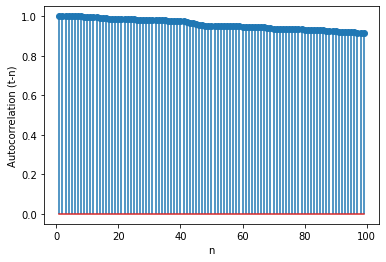

In [53]:
n=100
ac = [autocorr(sensor["rotationRate.x"],i) for i in range(1,n)]

plt.stem(range(1,n),ac)
plt.ylabel("Autocorrelation (t-n)")
plt.xlabel("n");

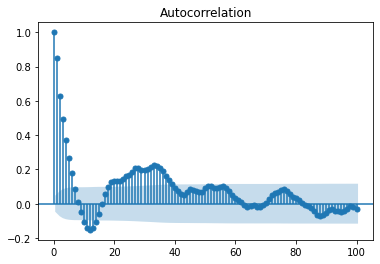

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sensor["rotationRate.x"], lags=100);


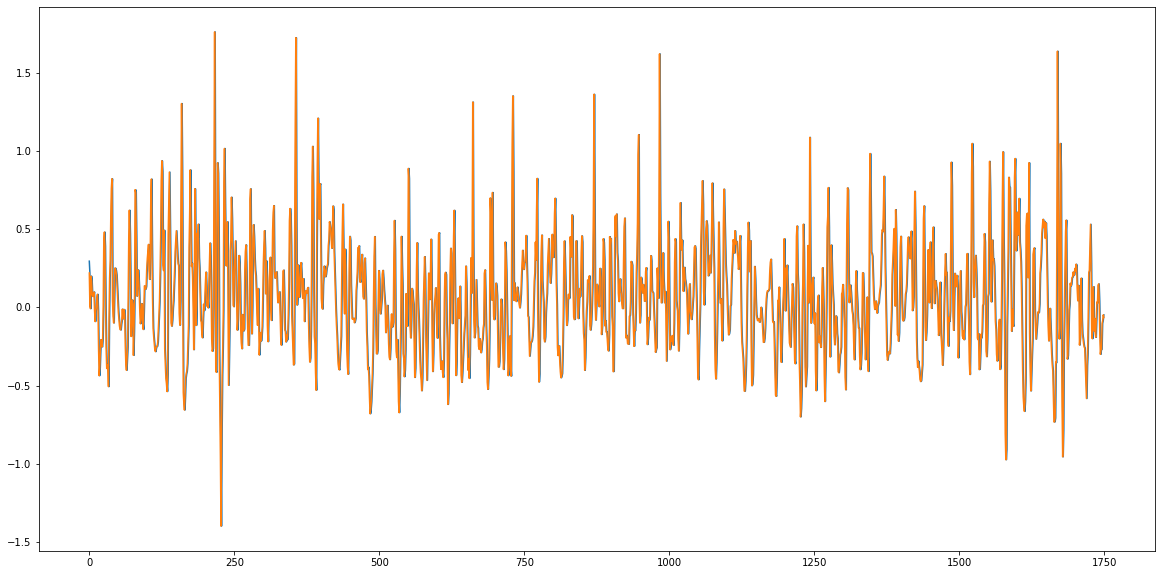

In [55]:

data=sensor['userAcceleration.x'][:-1]
data_plus1=sensor['userAcceleration.x'][1:]
plt.figure(figsize=(20,10))

plt.plot(data[:2000].values, label='y(t)')
plt.plot(data_plus1[:2000].values, label='y(t+10)')

No handles with labels found to put in legend.


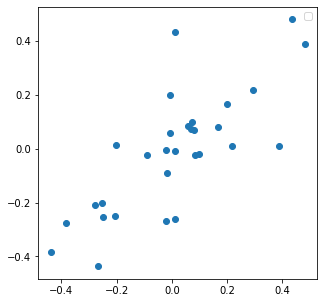

In [56]:
plt.figure(figsize=(5,5))
plt.scatter(data[:30].values, data_plus1[:30])
plt.legend();

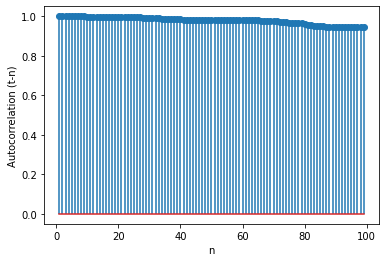

In [57]:
n=100
ac = [autocorr(sensor['userAcceleration.x'],i) for i in range(1,n)]

plt.stem(range(1,n),ac)
plt.ylabel("Autocorrelation (t-n)")
plt.xlabel("n");

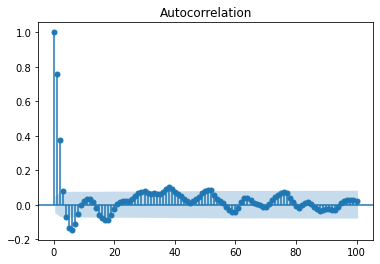

In [58]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sensor['userAcceleration.x'], lags=100);

Create a lag plot for `rotationRate.x`

What are your conclusions from both visualizations?

In [59]:
# Your conclusions here:



The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [60]:
from statsmodels.tsa.stattools import adfuller
res_acce=adfuller(sensor['userAcceleration.x'])
res_acce

(-17.957994086169762,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [61]:
adf, pvalue, usedlag, nobs, critical_values, icbest =res_acce
adf

-17.957994086169762

In [62]:
critical_values

{'1%': -3.434100824760071,
 '5%': -2.863196780129223,
 '10%': -2.5676520210882936}

In [68]:
pvalue

6.3202303359124956e-06

In [63]:
from statsmodels.tsa.stattools import adfuller
res_rot=adfuller(sensor['rotationRate.x'])
res_rot

(-5.269860625086411,
 6.3202303359124956e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

In [64]:
adf, pvalue, usedlag, nobs, critical_values, icbest =res_rot
adf

-5.269860625086411

In [65]:
critical_values

{'1%': -3.4341465551936534,
 '5%': -2.863216966926812,
 '10%': -2.567662770090317}

In [66]:
pvalue

6.3202303359124956e-06

What are your conclusions from this test?

Ambas señales tienes una baja autocorerelación, sólo da valores a considerar con ventanas pequeñas (algo que ya sabíamos si se trata de un dispositivo cuyas medidas están determinaadas por la intercia mecánica). Lo único que se me ocurre es que la rotación tenga un cierto repunte en las ventanas de n=30 muestras (aprox. puede que esto sea achacable a cambios de dirección periódicos).

Los resultados de ambos test son muy por debajo de los valores críticos por lo tanto nuestros datos no pueden ser estacionarios. Además nuestro pvalor es muy por debajo de 0.05 por lo que confirma que no son estacionarios.

